In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
BOOLEAN_FUNCTIONS = {
    "FALSE": [0,0,0,0],
    "AND":   [0,0,0,1],
    "A∧¬B":  [0,0,1,0],
    "A":     [0,0,1,1],
    "¬A∧B":  [0,1,0,0],
    "B":     [0,1,0,1],
    "XOR":   [0,1,1,0],
    "OR":    [0,1,1,1],
    "NOR":   [1,0,0,0],
    "XNOR":  [1,0,0,1],
    "¬B":    [1,0,1,0],
    "Av¬B":  [1,0,1,1],
    "¬A":    [1,1,0,0],
    "¬AvB":  [1,1,0,1],
    "NAND":  [1,1,1,0],
    "TRUE":  [1,1,1,1],
}
HIDDEN_OUTPUTS = np.eye(4)

In [3]:
def to_bipolar(truth):
    return np.array([1 if t == 1 else -1 for t in truth])

In [4]:
class StepOutputPerceptron:
    def __init__(self):
        self.w = np.random.uniform(-1, 1, 4)
        self.b = np.random.uniform(-1, 1)

    def activation(self, z):
        return 1 if z >= 0 else -1

    def predict(self, x):
        return self.activation(np.dot(self.w, x) + self.b)


In [ ]:
def train_step_PLA(truth, epochs=10):
    p = StepOutputPerceptron()
    y = to_bipolar(truth)

    weight_history = []
    bias_history = []

    print("\nInitial (STEP - PLA)")
    print("w:", p.w, "b:", p.b)

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}")
        for i, (x, yi) in enumerate(zip(HIDDEN_OUTPUTS, y)):
            z = np.dot(p.w, x) + p.b
            y_hat = p.activation(z)

            print(f" Input {i} | z={z:.3f} | ŷ={y_hat} | y={yi}")

            if y_hat != yi:
                p.w += yi * x
                p.b += yi
                print("  → Updated w:", p.w, "b:", p.b)

        if weight_history and np.array_equal(p.w, weight_history[-1]) and p.b == bias_history[-1]:
            print("No updates in this epoch, stopping early.")
            break
        weight_history.append(p.w.copy())
        bias_history.append(p.b)

    return np.array(weight_history), np.array(bias_history)


In [6]:
class SigmoidOutputPerceptron:
    def __init__(self):
        self.w = np.random.uniform(-1, 1, 4)
        self.b = np.random.uniform(-1, 1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        z = np.dot(self.w, x) + self.b
        return 1 if self.sigmoid(z) >= 0.5 else -1


In [ ]:
def train_sigmoid_PLA(truth, epochs=10):
    p = SigmoidOutputPerceptron()
    y = to_bipolar(truth)

    weight_history = []
    bias_history = []

    print("\nInitial (SIGMOID - PLA)")
    print("w:", p.w, "b:", p.b)

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}")
        for i, (x, yi) in enumerate(zip(HIDDEN_OUTPUTS, y)):
            z = np.dot(p.w, x) + p.b
            y_hat = 1 if p.sigmoid(z) >= 0.5 else -1

            print(f" Input {i} | z={z:.3f} | f(z)={p.sigmoid(z):.3f} | ŷ={y_hat} | y={yi}")

            if y_hat != yi:
                p.w += yi * x
                p.b += yi
                print("  → Updated w:", p.w, "b:", p.b)

        if weight_history and np.array_equal(p.w, weight_history[-1]) and p.b == bias_history[-1]:
            print("No updates in this epoch, stopping early.")
            break
        weight_history.append(p.w.copy())
        bias_history.append(p.b)

    return np.array(weight_history), np.array(bias_history)


In [8]:
def plot_learning(weights, bias, title):
    plt.figure(figsize=(8,4))

    for i, lbl in enumerate(['w(00)', 'w(01)', 'w(10)', 'w(11)']):
        plt.plot(weights[:, i], label=lbl)

    plt.plot(bias, 'k--', label='bias')

    plt.axhline(0, color='black', linewidth=0.6)
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()



Initial (STEP – PLA)
w: [ 0.29854064  0.15195042 -0.09638199  0.0421426 ] b: -0.07871456235837004

Epoch 1
 Input 0 | z=0.220 | ŷ=1 | y=-1
  → Updated w: [-0.70145936  0.15195042 -0.09638199  0.0421426 ] b: -1.07871456235837
 Input 1 | z=-0.927 | ŷ=-1 | y=1
  → Updated w: [-0.70145936  1.15195042 -0.09638199  0.0421426 ] b: -0.07871456235837004
 Input 2 | z=-0.175 | ŷ=-1 | y=1
  → Updated w: [-0.70145936  1.15195042  0.90361801  0.0421426 ] b: 0.92128543764163
 Input 3 | z=0.963 | ŷ=1 | y=-1
  → Updated w: [-0.70145936  1.15195042  0.90361801 -0.9578574 ] b: -0.07871456235837004

Epoch 2
 Input 0 | z=-0.780 | ŷ=-1 | y=-1
 Input 1 | z=1.073 | ŷ=1 | y=1
 Input 2 | z=0.825 | ŷ=1 | y=1
 Input 3 | z=-1.037 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-0.780 | ŷ=-1 | y=-1
 Input 1 | z=1.073 | ŷ=1 | y=1
 Input 2 | z=0.825 | ŷ=1 | y=1
 Input 3 | z=-1.037 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=-0.780 | ŷ=-1 | y=-1
 Input 1 | z=1.073 | ŷ=1 | y=1
 Input 2 | z=0.825 | ŷ=1 | y=1
 Input 3 | z=-1

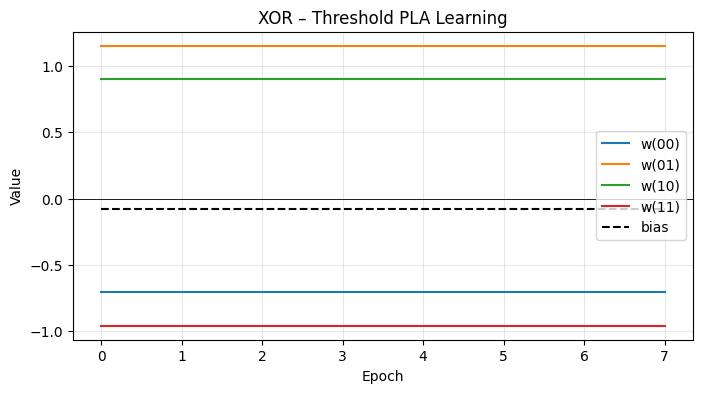

In [ ]:
# Example Boolean function
truth = BOOLEAN_FUNCTIONS["XOR"]

# TRAIN
w_step, b_step = train_step_PLA(truth, epochs=8)

# VISUALIZE
plot_learning(w_step, b_step, "XOR - Threshold PLA Learning")


Initial (SIGMOID – PLA)
w: [-0.83901149  0.83794166 -0.74897937  0.76635185] b: 0.7588021585168827

Epoch 1
 Input 0 | z=-0.080 | σ(z)=0.480 | ŷ=-1 | y=-1
 Input 1 | z=1.597 | σ(z)=0.832 | ŷ=1 | y=1
 Input 2 | z=0.010 | σ(z)=0.502 | ŷ=1 | y=1
 Input 3 | z=1.525 | σ(z)=0.821 | ŷ=1 | y=-1
  → Updated w: [-0.83901149  0.83794166 -0.74897937 -0.23364815] b: -0.2411978414831173

Epoch 2
 Input 0 | z=-1.080 | σ(z)=0.253 | ŷ=-1 | y=-1
 Input 1 | z=0.597 | σ(z)=0.645 | ŷ=1 | y=1
 Input 2 | z=-0.990 | σ(z)=0.271 | ŷ=-1 | y=1
  → Updated w: [-0.83901149  0.83794166  0.25102063 -0.23364815] b: 0.7588021585168827
 Input 3 | z=0.525 | σ(z)=0.628 | ŷ=1 | y=-1
  → Updated w: [-0.83901149  0.83794166  0.25102063 -1.23364815] b: -0.2411978414831173

Epoch 3
 Input 0 | z=-1.080 | σ(z)=0.253 | ŷ=-1 | y=-1
 Input 1 | z=0.597 | σ(z)=0.645 | ŷ=1 | y=1
 Input 2 | z=0.010 | σ(z)=0.502 | ŷ=1 | y=1
 Input 3 | z=-1.475 | σ(z)=0.186 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=-1.080 | σ(z)=0.253 | ŷ=-1 | y=

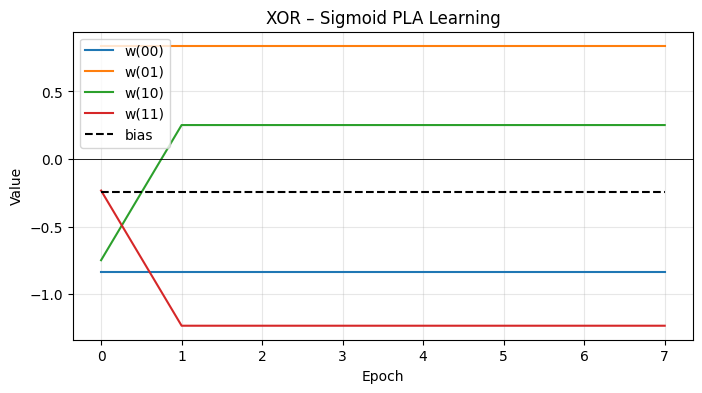

In [11]:
# TRAIN
w_sig, b_sig = train_sigmoid_PLA(truth, epochs=8)

# VISUALIZE
plot_learning(w_sig, b_sig, "XOR – Sigmoid PLA Learning")



FALSE — Threshold PLA

Initial (STEP – PLA)
w: [ 0.47691768 -0.5028007   0.73669329  0.05724624] b: 0.8960551787999511

Epoch 1
 Input 0 | z=1.373 | ŷ=1 | y=-1
  → Updated w: [-0.52308232 -0.5028007   0.73669329  0.05724624] b: -0.10394482120004889
 Input 1 | z=-0.607 | ŷ=-1 | y=-1
 Input 2 | z=0.633 | ŷ=1 | y=-1
  → Updated w: [-0.52308232 -0.5028007  -0.26330671  0.05724624] b: -1.1039448212000489
 Input 3 | z=-1.047 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-1.627 | ŷ=-1 | y=-1
 Input 1 | z=-1.607 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | ŷ=-1 | y=-1
 Input 3 | z=-1.047 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-1.627 | ŷ=-1 | y=-1
 Input 1 | z=-1.607 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | ŷ=-1 | y=-1
 Input 3 | z=-1.047 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=-1.627 | ŷ=-1 | y=-1
 Input 1 | z=-1.607 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | ŷ=-1 | y=-1
 Input 3 | z=-1.047 | ŷ=-1 | y=-1

Epoch 5
 Input 0 | z=-1.627 | ŷ=-1 | y=-1
 Input 1 | z=-1.607 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | ŷ=-1 | y=

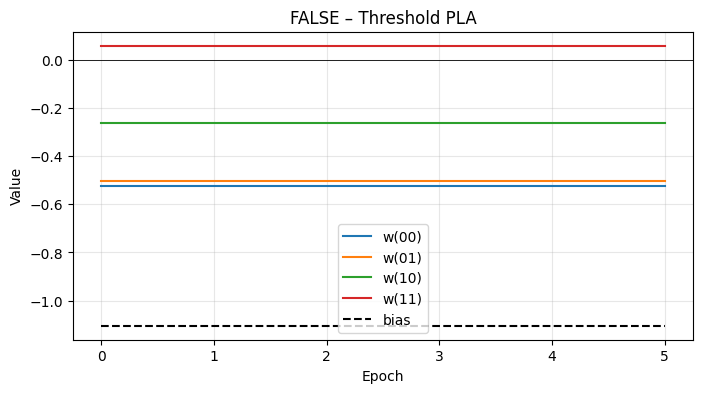


FALSE — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.13231181 -0.23890796  0.22032872  0.59498297] b: -0.12296042142703167

Epoch 1
 Input 0 | z=0.009 | σ(z)=0.502 | ŷ=1 | y=-1
  → Updated w: [-0.86768819 -0.23890796  0.22032872  0.59498297] b: -1.1229604214270317
 Input 1 | z=-1.362 | σ(z)=0.204 | ŷ=-1 | y=-1
 Input 2 | z=-0.903 | σ(z)=0.289 | ŷ=-1 | y=-1
 Input 3 | z=-0.528 | σ(z)=0.371 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-1.991 | σ(z)=0.120 | ŷ=-1 | y=-1
 Input 1 | z=-1.362 | σ(z)=0.204 | ŷ=-1 | y=-1
 Input 2 | z=-0.903 | σ(z)=0.289 | ŷ=-1 | y=-1
 Input 3 | z=-0.528 | σ(z)=0.371 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-1.991 | σ(z)=0.120 | ŷ=-1 | y=-1
 Input 1 | z=-1.362 | σ(z)=0.204 | ŷ=-1 | y=-1
 Input 2 | z=-0.903 | σ(z)=0.289 | ŷ=-1 | y=-1
 Input 3 | z=-0.528 | σ(z)=0.371 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=-1.991 | σ(z)=0.120 | ŷ=-1 | y=-1
 Input 1 | z=-1.362 | σ(z)=0.204 | ŷ=-1 | y=-1
 Input 2 | z=-0.903 | σ(z)=0.289 | ŷ=-1 | y=-1
 Input 3 | z=-0.528 | σ(z)=0.371 | 

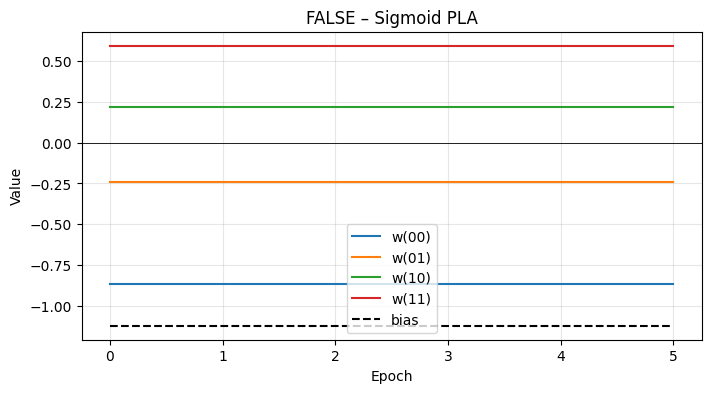


AND — Threshold PLA

Initial (STEP – PLA)
w: [-0.94591766  0.68072881 -0.60636166 -0.2443261 ] b: -0.9699982550647961

Epoch 1
 Input 0 | z=-1.916 | ŷ=-1 | y=-1
 Input 1 | z=-0.289 | ŷ=-1 | y=-1
 Input 2 | z=-1.576 | ŷ=-1 | y=-1
 Input 3 | z=-1.214 | ŷ=-1 | y=1
  → Updated w: [-0.94591766  0.68072881 -0.60636166  0.7556739 ] b: 0.03000174493520391

Epoch 2
 Input 0 | z=-0.916 | ŷ=-1 | y=-1
 Input 1 | z=0.711 | ŷ=1 | y=-1
  → Updated w: [-0.94591766 -0.31927119 -0.60636166  0.7556739 ] b: -0.9699982550647961
 Input 2 | z=-1.576 | ŷ=-1 | y=-1
 Input 3 | z=-0.214 | ŷ=-1 | y=1
  → Updated w: [-0.94591766 -0.31927119 -0.60636166  1.7556739 ] b: 0.03000174493520391

Epoch 3
 Input 0 | z=-0.916 | ŷ=-1 | y=-1
 Input 1 | z=-0.289 | ŷ=-1 | y=-1
 Input 2 | z=-0.576 | ŷ=-1 | y=-1
 Input 3 | z=1.786 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-0.916 | ŷ=-1 | y=-1
 Input 1 | z=-0.289 | ŷ=-1 | y=-1
 Input 2 | z=-0.576 | ŷ=-1 | y=-1
 Input 3 | z=1.786 | ŷ=1 | y=1

Epoch 5
 Input 0 | z=-0.916 | 

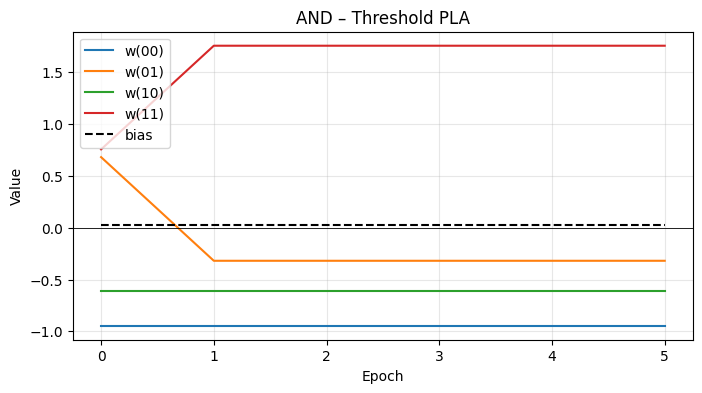


AND — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [-0.20197977  0.42169822 -0.77945488 -0.12376181] b: -0.5878194788719355

Epoch 1
 Input 0 | z=-0.790 | σ(z)=0.312 | ŷ=-1 | y=-1
 Input 1 | z=-0.166 | σ(z)=0.459 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | σ(z)=0.203 | ŷ=-1 | y=-1
 Input 3 | z=-0.712 | σ(z)=0.329 | ŷ=-1 | y=1
  → Updated w: [-0.20197977  0.42169822 -0.77945488  0.87623819] b: 0.41218052112806447

Epoch 2
 Input 0 | z=0.210 | σ(z)=0.552 | ŷ=1 | y=-1
  → Updated w: [-1.20197977  0.42169822 -0.77945488  0.87623819] b: -0.5878194788719355
 Input 1 | z=-0.166 | σ(z)=0.459 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | σ(z)=0.203 | ŷ=-1 | y=-1
 Input 3 | z=0.288 | σ(z)=0.572 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=-1.790 | σ(z)=0.143 | ŷ=-1 | y=-1
 Input 1 | z=-0.166 | σ(z)=0.459 | ŷ=-1 | y=-1
 Input 2 | z=-1.367 | σ(z)=0.203 | ŷ=-1 | y=-1
 Input 3 | z=0.288 | σ(z)=0.572 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-1.790 | σ(z)=0.143 | ŷ=-1 | y=-1
 Input 1 | z=-0.166 | σ(z)=0.459 | ŷ=-1 | y=-1
 Inpu

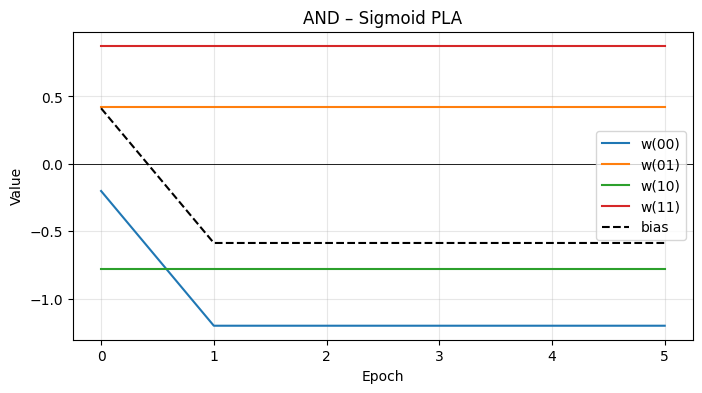


A∧¬B — Threshold PLA

Initial (STEP – PLA)
w: [ 0.38341128  0.95514216 -0.77894267  0.60922376] b: -0.1383025287577686

Epoch 1
 Input 0 | z=0.245 | ŷ=1 | y=-1
  → Updated w: [-0.61658872  0.95514216 -0.77894267  0.60922376] b: -1.1383025287577686
 Input 1 | z=-0.183 | ŷ=-1 | y=-1
 Input 2 | z=-1.917 | ŷ=-1 | y=1
  → Updated w: [-0.61658872  0.95514216  0.22105733  0.60922376] b: -0.1383025287577686
 Input 3 | z=0.471 | ŷ=1 | y=-1
  → Updated w: [-0.61658872  0.95514216  0.22105733 -0.39077624] b: -1.1383025287577686

Epoch 2
 Input 0 | z=-1.755 | ŷ=-1 | y=-1
 Input 1 | z=-0.183 | ŷ=-1 | y=-1
 Input 2 | z=-0.917 | ŷ=-1 | y=1
  → Updated w: [-0.61658872  0.95514216  1.22105733 -0.39077624] b: -0.1383025287577686
 Input 3 | z=-0.529 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-0.755 | ŷ=-1 | y=-1
 Input 1 | z=0.817 | ŷ=1 | y=-1
  → Updated w: [-0.61658872 -0.04485784  1.22105733 -0.39077624] b: -1.1383025287577686
 Input 2 | z=0.083 | ŷ=1 | y=1
 Input 3 | z=-1.529 | ŷ=-1 | y=-1

Epo

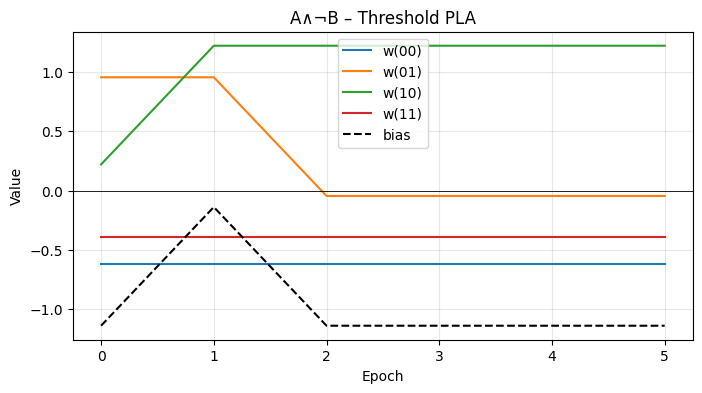


A∧¬B — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.82871674  0.92921045 -0.43328178 -0.73589819] b: -0.8324555263762801

Epoch 1
 Input 0 | z=-0.004 | σ(z)=0.499 | ŷ=-1 | y=-1
 Input 1 | z=0.097 | σ(z)=0.524 | ŷ=1 | y=-1
  → Updated w: [ 0.82871674 -0.07078955 -0.43328178 -0.73589819] b: -1.83245552637628
 Input 2 | z=-2.266 | σ(z)=0.094 | ŷ=-1 | y=1
  → Updated w: [ 0.82871674 -0.07078955  0.56671822 -0.73589819] b: -0.8324555263762801
 Input 3 | z=-1.568 | σ(z)=0.172 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-0.004 | σ(z)=0.499 | ŷ=-1 | y=-1
 Input 1 | z=-0.903 | σ(z)=0.288 | ŷ=-1 | y=-1
 Input 2 | z=-0.266 | σ(z)=0.434 | ŷ=-1 | y=1
  → Updated w: [ 0.82871674 -0.07078955  1.56671822 -0.73589819] b: 0.16754447362371994
 Input 3 | z=-0.568 | σ(z)=0.362 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=0.996 | σ(z)=0.730 | ŷ=1 | y=-1
  → Updated w: [-0.17128326 -0.07078955  1.56671822 -0.73589819] b: -0.8324555263762801
 Input 1 | z=-0.903 | σ(z)=0.288 | ŷ=-1 | y=-1
 Input 2 | z=0.734 | σ(z)=0.

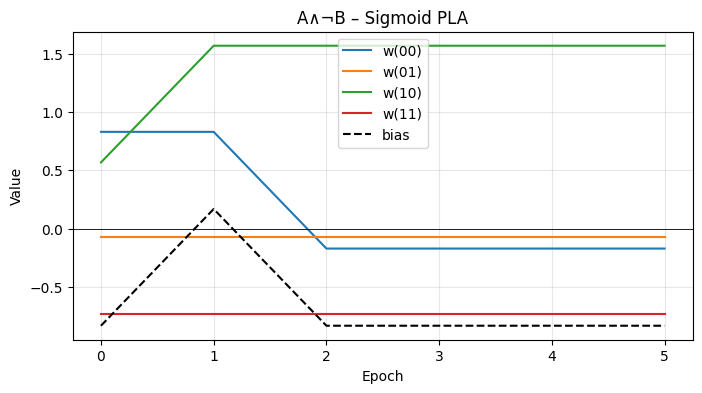


A — Threshold PLA

Initial (STEP – PLA)
w: [ 0.61637202  0.54503567 -0.41502629  0.31439786] b: 0.42257687995398996

Epoch 1
 Input 0 | z=1.039 | ŷ=1 | y=-1
  → Updated w: [-0.38362798  0.54503567 -0.41502629  0.31439786] b: -0.57742312004601
 Input 1 | z=-0.032 | ŷ=-1 | y=-1
 Input 2 | z=-0.992 | ŷ=-1 | y=1
  → Updated w: [-0.38362798  0.54503567  0.58497371  0.31439786] b: 0.42257687995398996
 Input 3 | z=0.737 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=0.039 | ŷ=1 | y=-1
  → Updated w: [-1.38362798  0.54503567  0.58497371  0.31439786] b: -0.57742312004601
 Input 1 | z=-0.032 | ŷ=-1 | y=-1
 Input 2 | z=0.008 | ŷ=1 | y=1
 Input 3 | z=-0.263 | ŷ=-1 | y=1
  → Updated w: [-1.38362798  0.54503567  0.58497371  1.31439786] b: 0.42257687995398996

Epoch 3
 Input 0 | z=-0.961 | ŷ=-1 | y=-1
 Input 1 | z=0.968 | ŷ=1 | y=-1
  → Updated w: [-1.38362798 -0.45496433  0.58497371  1.31439786] b: -0.57742312004601
 Input 2 | z=0.008 | ŷ=1 | y=1
 Input 3 | z=0.737 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=

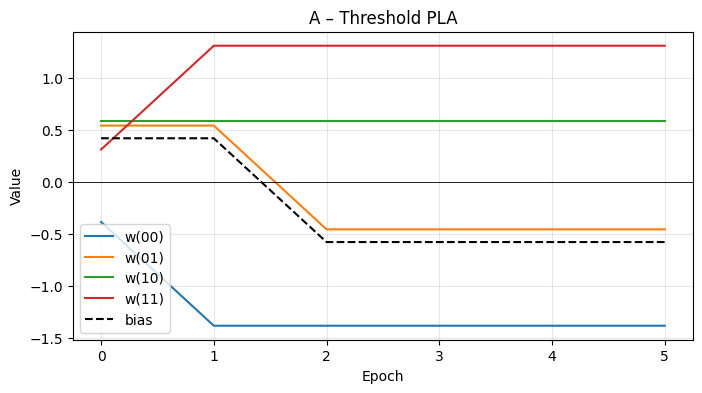


A — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [-0.19745278 -0.80493685 -0.85883003  0.91950897] b: -0.7793768845116249

Epoch 1
 Input 0 | z=-0.977 | σ(z)=0.274 | ŷ=-1 | y=-1
 Input 1 | z=-1.584 | σ(z)=0.170 | ŷ=-1 | y=-1
 Input 2 | z=-1.638 | σ(z)=0.163 | ŷ=-1 | y=1
  → Updated w: [-0.19745278 -0.80493685  0.14116997  0.91950897] b: 0.2206231154883751
 Input 3 | z=1.140 | σ(z)=0.758 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=0.023 | σ(z)=0.506 | ŷ=1 | y=-1
  → Updated w: [-1.19745278 -0.80493685  0.14116997  0.91950897] b: -0.7793768845116249
 Input 1 | z=-1.584 | σ(z)=0.170 | ŷ=-1 | y=-1
 Input 2 | z=-0.638 | σ(z)=0.346 | ŷ=-1 | y=1
  → Updated w: [-1.19745278 -0.80493685  1.14116997  0.91950897] b: 0.2206231154883751
 Input 3 | z=1.140 | σ(z)=0.758 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=-0.977 | σ(z)=0.274 | ŷ=-1 | y=-1
 Input 1 | z=-0.584 | σ(z)=0.358 | ŷ=-1 | y=-1
 Input 2 | z=1.362 | σ(z)=0.796 | ŷ=1 | y=1
 Input 3 | z=1.140 | σ(z)=0.758 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-0.977 | σ(

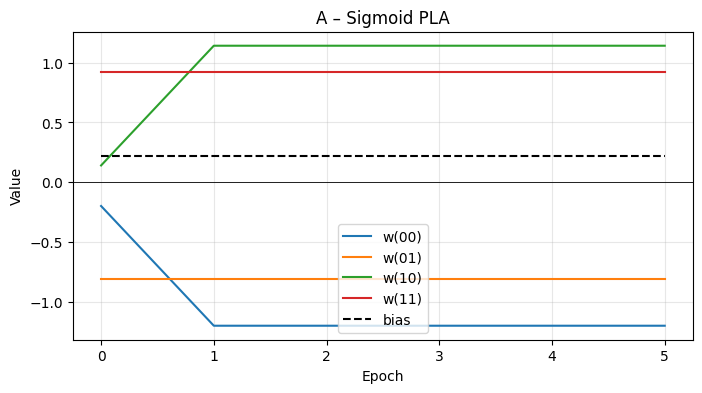


¬A∧B — Threshold PLA

Initial (STEP – PLA)
w: [-0.4223647  -0.5457012  -0.57201649  0.91817926] b: -0.23379959313135346

Epoch 1
 Input 0 | z=-0.656 | ŷ=-1 | y=-1
 Input 1 | z=-0.780 | ŷ=-1 | y=1
  → Updated w: [-0.4223647   0.4542988  -0.57201649  0.91817926] b: 0.7662004068686465
 Input 2 | z=0.194 | ŷ=1 | y=-1
  → Updated w: [-0.4223647   0.4542988  -1.57201649  0.91817926] b: -0.23379959313135346
 Input 3 | z=0.684 | ŷ=1 | y=-1
  → Updated w: [-0.4223647   0.4542988  -1.57201649 -0.08182074] b: -1.2337995931313535

Epoch 2
 Input 0 | z=-1.656 | ŷ=-1 | y=-1
 Input 1 | z=-0.780 | ŷ=-1 | y=1
  → Updated w: [-0.4223647   1.4542988  -1.57201649 -0.08182074] b: -0.23379959313135346
 Input 2 | z=-1.806 | ŷ=-1 | y=-1
 Input 3 | z=-0.316 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-0.656 | ŷ=-1 | y=-1
 Input 1 | z=1.220 | ŷ=1 | y=1
 Input 2 | z=-1.806 | ŷ=-1 | y=-1
 Input 3 | z=-0.316 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=-0.656 | ŷ=-1 | y=-1
 Input 1 | z=1.220 | ŷ=1 | y=1
 Input 2 | z

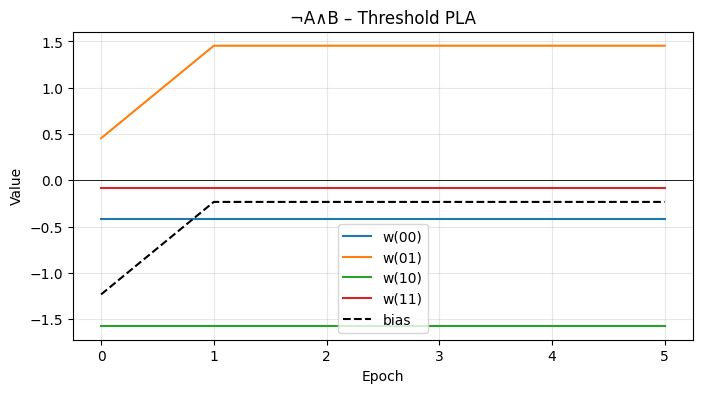


¬A∧B — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.75446079 -0.70250732  0.61995837  0.36366045] b: -0.6186745878755089

Epoch 1
 Input 0 | z=0.136 | σ(z)=0.534 | ŷ=1 | y=-1
  → Updated w: [-0.24553921 -0.70250732  0.61995837  0.36366045] b: -1.6186745878755089
 Input 1 | z=-2.321 | σ(z)=0.089 | ŷ=-1 | y=1
  → Updated w: [-0.24553921  0.29749268  0.61995837  0.36366045] b: -0.6186745878755089
 Input 2 | z=0.001 | σ(z)=0.500 | ŷ=1 | y=-1
  → Updated w: [-0.24553921  0.29749268 -0.38004163  0.36366045] b: -1.6186745878755089
 Input 3 | z=-1.255 | σ(z)=0.222 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-1.864 | σ(z)=0.134 | ŷ=-1 | y=-1
 Input 1 | z=-1.321 | σ(z)=0.211 | ŷ=-1 | y=1
  → Updated w: [-0.24553921  1.29749268 -0.38004163  0.36366045] b: -0.6186745878755089
 Input 2 | z=-0.999 | σ(z)=0.269 | ŷ=-1 | y=-1
 Input 3 | z=-0.255 | σ(z)=0.437 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-0.864 | σ(z)=0.296 | ŷ=-1 | y=-1
 Input 1 | z=0.679 | σ(z)=0.663 | ŷ=1 | y=1
 Input 2 | z=-0.999 | σ(z)=0.

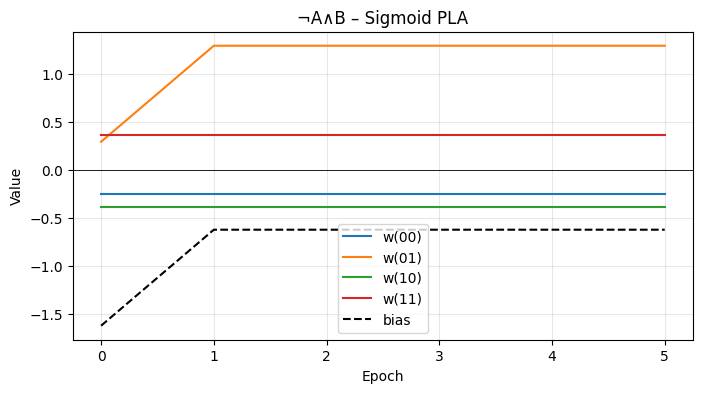


B — Threshold PLA

Initial (STEP – PLA)
w: [ 0.99978521 -0.07510891  0.11665843 -0.26541629] b: -0.010621342909394649

Epoch 1
 Input 0 | z=0.989 | ŷ=1 | y=-1
  → Updated w: [-2.14789970e-04 -7.51089067e-02  1.16658429e-01 -2.65416293e-01] b: -1.0106213429093946
 Input 1 | z=-1.086 | ŷ=-1 | y=1
  → Updated w: [-2.14789970e-04  9.24891093e-01  1.16658429e-01 -2.65416293e-01] b: -0.010621342909394649
 Input 2 | z=0.106 | ŷ=1 | y=-1
  → Updated w: [-2.14789970e-04  9.24891093e-01 -8.83341571e-01 -2.65416293e-01] b: -1.0106213429093946
 Input 3 | z=-1.276 | ŷ=-1 | y=1
  → Updated w: [-2.14789970e-04  9.24891093e-01 -8.83341571e-01  7.34583707e-01] b: -0.010621342909394649

Epoch 2
 Input 0 | z=-0.011 | ŷ=-1 | y=-1
 Input 1 | z=0.914 | ŷ=1 | y=1
 Input 2 | z=-0.894 | ŷ=-1 | y=-1
 Input 3 | z=0.724 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=-0.011 | ŷ=-1 | y=-1
 Input 1 | z=0.914 | ŷ=1 | y=1
 Input 2 | z=-0.894 | ŷ=-1 | y=-1
 Input 3 | z=0.724 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-0.011 | y

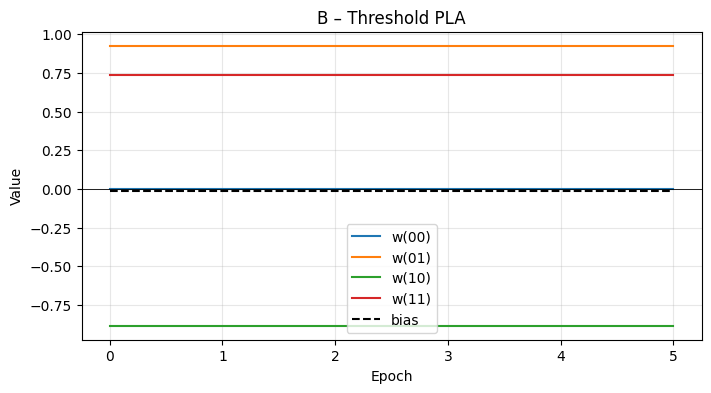


B — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.01651112 -0.4808944  -0.08122951  0.05011002] b: 0.9506440465847177

Epoch 1
 Input 0 | z=0.967 | σ(z)=0.725 | ŷ=1 | y=-1
  → Updated w: [-0.98348888 -0.4808944  -0.08122951  0.05011002] b: -0.049355953415282316
 Input 1 | z=-0.530 | σ(z)=0.370 | ŷ=-1 | y=1
  → Updated w: [-0.98348888  0.5191056  -0.08122951  0.05011002] b: 0.9506440465847177
 Input 2 | z=0.869 | σ(z)=0.705 | ŷ=1 | y=-1
  → Updated w: [-0.98348888  0.5191056  -1.08122951  0.05011002] b: -0.049355953415282316
 Input 3 | z=0.001 | σ(z)=0.500 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=-1.033 | σ(z)=0.263 | ŷ=-1 | y=-1
 Input 1 | z=0.470 | σ(z)=0.615 | ŷ=1 | y=1
 Input 2 | z=-1.131 | σ(z)=0.244 | ŷ=-1 | y=-1
 Input 3 | z=0.001 | σ(z)=0.500 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=-1.033 | σ(z)=0.263 | ŷ=-1 | y=-1
 Input 1 | z=0.470 | σ(z)=0.615 | ŷ=1 | y=1
 Input 2 | z=-1.131 | σ(z)=0.244 | ŷ=-1 | y=-1
 Input 3 | z=0.001 | σ(z)=0.500 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-1.033 | σ(

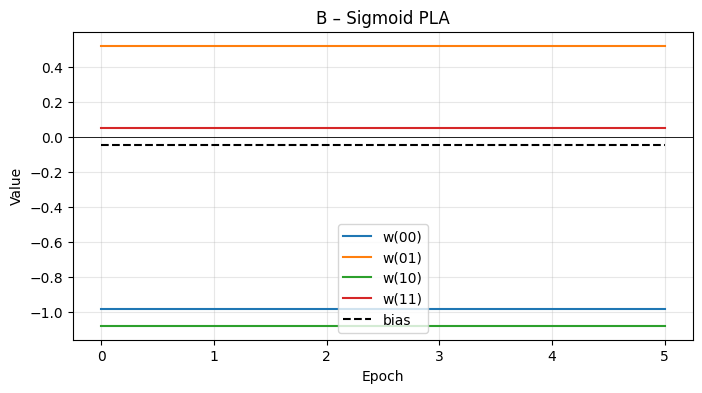


XOR — Threshold PLA

Initial (STEP – PLA)
w: [ 0.1944652  -0.85610218 -0.19687894  0.98945764] b: -0.9482735804210307

Epoch 1
 Input 0 | z=-0.754 | ŷ=-1 | y=-1
 Input 1 | z=-1.804 | ŷ=-1 | y=1
  → Updated w: [ 0.1944652   0.14389782 -0.19687894  0.98945764] b: 0.051726419578969285
 Input 2 | z=-0.145 | ŷ=-1 | y=1
  → Updated w: [0.1944652  0.14389782 0.80312106 0.98945764] b: 1.0517264195789693
 Input 3 | z=2.041 | ŷ=1 | y=-1
  → Updated w: [ 0.1944652   0.14389782  0.80312106 -0.01054236] b: 0.051726419578969285

Epoch 2
 Input 0 | z=0.246 | ŷ=1 | y=-1
  → Updated w: [-0.8055348   0.14389782  0.80312106 -0.01054236] b: -0.9482735804210307
 Input 1 | z=-0.804 | ŷ=-1 | y=1
  → Updated w: [-0.8055348   1.14389782  0.80312106 -0.01054236] b: 0.051726419578969285
 Input 2 | z=0.855 | ŷ=1 | y=1
 Input 3 | z=0.041 | ŷ=1 | y=-1
  → Updated w: [-0.8055348   1.14389782  0.80312106 -1.01054236] b: -0.9482735804210307

Epoch 3
 Input 0 | z=-1.754 | ŷ=-1 | y=-1
 Input 1 | z=0.196 | ŷ=1

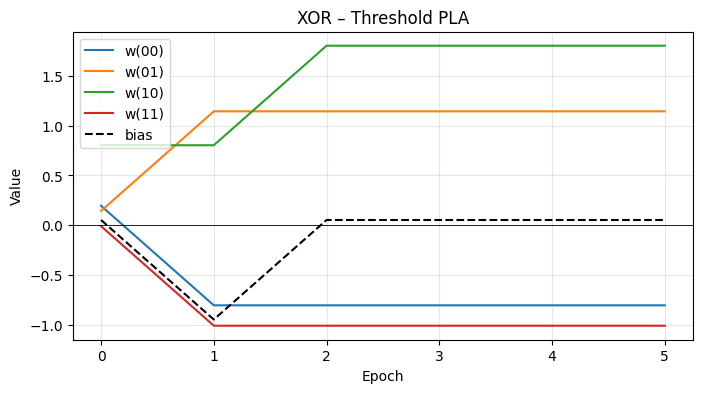


XOR — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.72733327  0.410156    0.61658604 -0.86664668] b: 0.9324493284538142

Epoch 1
 Input 0 | z=1.660 | σ(z)=0.840 | ŷ=1 | y=-1
  → Updated w: [-0.27266673  0.410156    0.61658604 -0.86664668] b: -0.06755067154618577
 Input 1 | z=0.343 | σ(z)=0.585 | ŷ=1 | y=1
 Input 2 | z=0.549 | σ(z)=0.634 | ŷ=1 | y=1
 Input 3 | z=-0.934 | σ(z)=0.282 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-0.340 | σ(z)=0.416 | ŷ=-1 | y=-1
 Input 1 | z=0.343 | σ(z)=0.585 | ŷ=1 | y=1
 Input 2 | z=0.549 | σ(z)=0.634 | ŷ=1 | y=1
 Input 3 | z=-0.934 | σ(z)=0.282 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=-0.340 | σ(z)=0.416 | ŷ=-1 | y=-1
 Input 1 | z=0.343 | σ(z)=0.585 | ŷ=1 | y=1
 Input 2 | z=0.549 | σ(z)=0.634 | ŷ=1 | y=1
 Input 3 | z=-0.934 | σ(z)=0.282 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=-0.340 | σ(z)=0.416 | ŷ=-1 | y=-1
 Input 1 | z=0.343 | σ(z)=0.585 | ŷ=1 | y=1
 Input 2 | z=0.549 | σ(z)=0.634 | ŷ=1 | y=1
 Input 3 | z=-0.934 | σ(z)=0.282 | ŷ=-1 | y=-1

Epoch 5
 Inpu

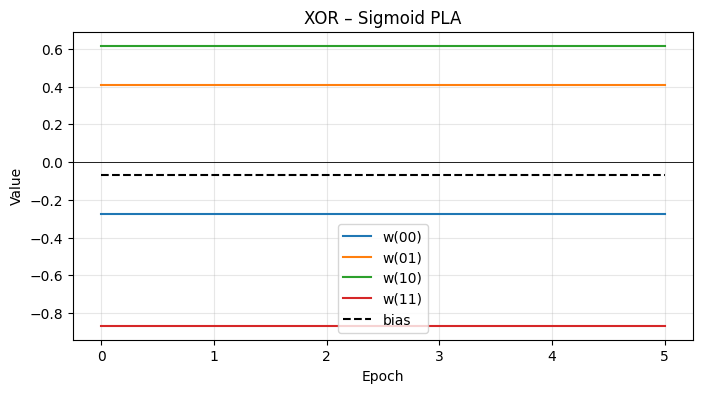


OR — Threshold PLA

Initial (STEP – PLA)
w: [-0.31485022  0.86662613 -0.75858539  0.55844393] b: -0.9947174616535122

Epoch 1
 Input 0 | z=-1.310 | ŷ=-1 | y=-1
 Input 1 | z=-0.128 | ŷ=-1 | y=1
  → Updated w: [-0.31485022  1.86662613 -0.75858539  0.55844393] b: 0.005282538346487842
 Input 2 | z=-0.753 | ŷ=-1 | y=1
  → Updated w: [-0.31485022  1.86662613  0.24141461  0.55844393] b: 1.0052825383464878
 Input 3 | z=1.564 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=0.690 | ŷ=1 | y=-1
  → Updated w: [-1.31485022  1.86662613  0.24141461  0.55844393] b: 0.005282538346487842
 Input 1 | z=1.872 | ŷ=1 | y=1
 Input 2 | z=0.247 | ŷ=1 | y=1
 Input 3 | z=0.564 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=-1.310 | ŷ=-1 | y=-1
 Input 1 | z=1.872 | ŷ=1 | y=1
 Input 2 | z=0.247 | ŷ=1 | y=1
 Input 3 | z=0.564 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-1.310 | ŷ=-1 | y=-1
 Input 1 | z=1.872 | ŷ=1 | y=1
 Input 2 | z=0.247 | ŷ=1 | y=1
 Input 3 | z=0.564 | ŷ=1 | y=1

Epoch 5
 Input 0 | z=-1.310 | ŷ=-1 | y=-1
 Input 1 | 

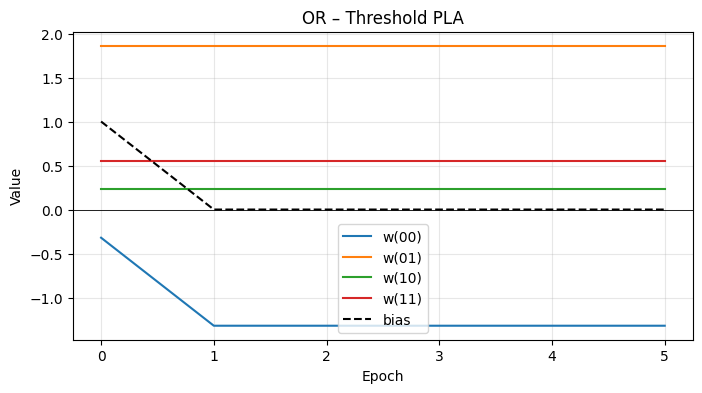


OR — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [-0.60962872  0.60790255 -0.20250437 -0.41382524] b: 0.11125535654416474

Epoch 1
 Input 0 | z=-0.498 | σ(z)=0.378 | ŷ=-1 | y=-1
 Input 1 | z=0.719 | σ(z)=0.672 | ŷ=1 | y=1
 Input 2 | z=-0.091 | σ(z)=0.477 | ŷ=-1 | y=1
  → Updated w: [-0.60962872  0.60790255  0.79749563 -0.41382524] b: 1.1112553565441647
 Input 3 | z=0.697 | σ(z)=0.668 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=0.502 | σ(z)=0.623 | ŷ=1 | y=-1
  → Updated w: [-1.60962872  0.60790255  0.79749563 -0.41382524] b: 0.11125535654416474
 Input 1 | z=0.719 | σ(z)=0.672 | ŷ=1 | y=1
 Input 2 | z=0.909 | σ(z)=0.713 | ŷ=1 | y=1
 Input 3 | z=-0.303 | σ(z)=0.425 | ŷ=-1 | y=1
  → Updated w: [-1.60962872  0.60790255  0.79749563  0.58617476] b: 1.1112553565441647

Epoch 3
 Input 0 | z=-0.498 | σ(z)=0.378 | ŷ=-1 | y=-1
 Input 1 | z=1.719 | σ(z)=0.848 | ŷ=1 | y=1
 Input 2 | z=1.909 | σ(z)=0.871 | ŷ=1 | y=1
 Input 3 | z=1.697 | σ(z)=0.845 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=-0.498 | σ(z)=0.378

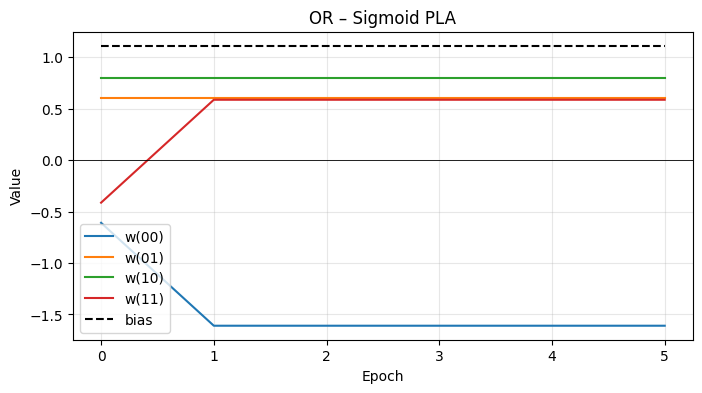


NOR — Threshold PLA

Initial (STEP – PLA)
w: [-0.90673355 -0.94433408  0.11193668 -0.50515821] b: -0.020801830300791302

Epoch 1
 Input 0 | z=-0.928 | ŷ=-1 | y=1
  → Updated w: [ 0.09326645 -0.94433408  0.11193668 -0.50515821] b: 0.9791981696992087
 Input 1 | z=0.035 | ŷ=1 | y=-1
  → Updated w: [ 0.09326645 -1.94433408  0.11193668 -0.50515821] b: -0.020801830300791302
 Input 2 | z=0.091 | ŷ=1 | y=-1
  → Updated w: [ 0.09326645 -1.94433408 -0.88806332 -0.50515821] b: -1.0208018303007913
 Input 3 | z=-1.526 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-0.928 | ŷ=-1 | y=1
  → Updated w: [ 1.09326645 -1.94433408 -0.88806332 -0.50515821] b: -0.020801830300791302
 Input 1 | z=-1.965 | ŷ=-1 | y=-1
 Input 2 | z=-0.909 | ŷ=-1 | y=-1
 Input 3 | z=-0.526 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=1.072 | ŷ=1 | y=1
 Input 1 | z=-1.965 | ŷ=-1 | y=-1
 Input 2 | z=-0.909 | ŷ=-1 | y=-1
 Input 3 | z=-0.526 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=1.072 | ŷ=1 | y=1
 Input 1 | z=-1.965 | ŷ=-1 | y=-1
 Input 2 |

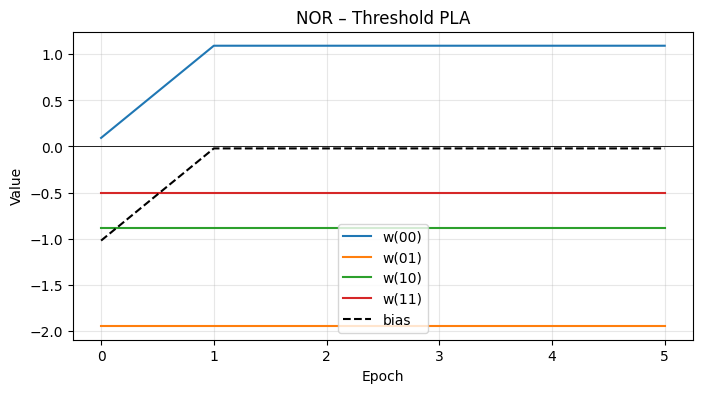


NOR — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [-0.73567048 -0.36564545  0.85441769  0.37367205] b: 0.04462291007867081

Epoch 1
 Input 0 | z=-0.691 | σ(z)=0.334 | ŷ=-1 | y=1
  → Updated w: [ 0.26432952 -0.36564545  0.85441769  0.37367205] b: 1.0446229100786708
 Input 1 | z=0.679 | σ(z)=0.664 | ŷ=1 | y=-1
  → Updated w: [ 0.26432952 -1.36564545  0.85441769  0.37367205] b: 0.04462291007867081
 Input 2 | z=0.899 | σ(z)=0.711 | ŷ=1 | y=-1
  → Updated w: [ 0.26432952 -1.36564545 -0.14558231  0.37367205] b: -0.9553770899213292
 Input 3 | z=-0.582 | σ(z)=0.359 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=-0.691 | σ(z)=0.334 | ŷ=-1 | y=1
  → Updated w: [ 1.26432952 -1.36564545 -0.14558231  0.37367205] b: 0.04462291007867081
 Input 1 | z=-1.321 | σ(z)=0.211 | ŷ=-1 | y=-1
 Input 2 | z=-0.101 | σ(z)=0.475 | ŷ=-1 | y=-1
 Input 3 | z=0.418 | σ(z)=0.603 | ŷ=1 | y=-1
  → Updated w: [ 1.26432952 -1.36564545 -0.14558231 -0.62632795] b: -0.9553770899213292

Epoch 3
 Input 0 | z=0.309 | σ(z)=0.577 | ŷ=1

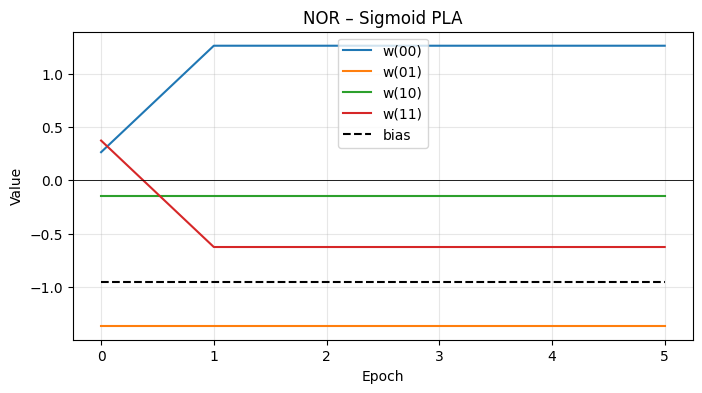


XNOR — Threshold PLA

Initial (STEP – PLA)
w: [-0.09761558  0.93871841  0.15894553 -0.5697058 ] b: 0.7728935785354198

Epoch 1
 Input 0 | z=0.675 | ŷ=1 | y=1
 Input 1 | z=1.712 | ŷ=1 | y=-1
  → Updated w: [-0.09761558 -0.06128159  0.15894553 -0.5697058 ] b: -0.22710642146458015
 Input 2 | z=-0.068 | ŷ=-1 | y=-1
 Input 3 | z=-0.797 | ŷ=-1 | y=1
  → Updated w: [-0.09761558 -0.06128159  0.15894553  0.4302942 ] b: 0.7728935785354198

Epoch 2
 Input 0 | z=0.675 | ŷ=1 | y=1
 Input 1 | z=0.712 | ŷ=1 | y=-1
  → Updated w: [-0.09761558 -1.06128159  0.15894553  0.4302942 ] b: -0.22710642146458015
 Input 2 | z=-0.068 | ŷ=-1 | y=-1
 Input 3 | z=0.203 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=-0.325 | ŷ=-1 | y=1
  → Updated w: [ 0.90238442 -1.06128159  0.15894553  0.4302942 ] b: 0.7728935785354198
 Input 1 | z=-0.288 | ŷ=-1 | y=-1
 Input 2 | z=0.932 | ŷ=1 | y=-1
  → Updated w: [ 0.90238442 -1.06128159 -0.84105447  0.4302942 ] b: -0.22710642146458015
 Input 3 | z=0.203 | ŷ=1 | y=1

Epoch 4
 Inp

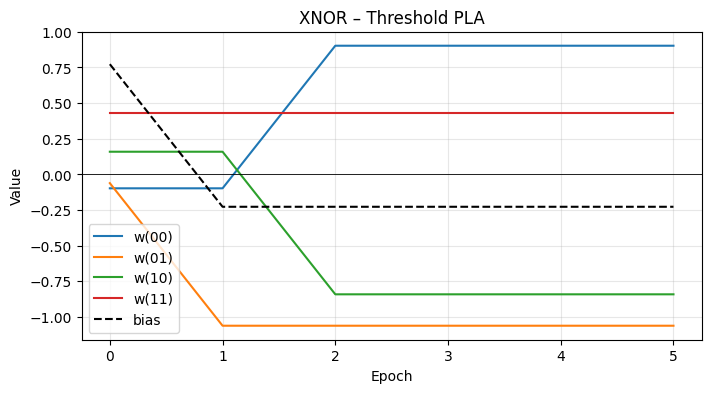


XNOR — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.22873388 -0.69616958 -0.3116129  -0.74028629] b: -0.47623835518384183

Epoch 1
 Input 0 | z=-0.248 | σ(z)=0.438 | ŷ=-1 | y=1
  → Updated w: [ 1.22873388 -0.69616958 -0.3116129  -0.74028629] b: 0.5237616448161582
 Input 1 | z=-0.172 | σ(z)=0.457 | ŷ=-1 | y=-1
 Input 2 | z=0.212 | σ(z)=0.553 | ŷ=1 | y=-1
  → Updated w: [ 1.22873388 -0.69616958 -1.3116129  -0.74028629] b: -0.47623835518384183
 Input 3 | z=-1.217 | σ(z)=0.229 | ŷ=-1 | y=1
  → Updated w: [ 1.22873388 -0.69616958 -1.3116129   0.25971371] b: 0.5237616448161582

Epoch 2
 Input 0 | z=1.752 | σ(z)=0.852 | ŷ=1 | y=1
 Input 1 | z=-0.172 | σ(z)=0.457 | ŷ=-1 | y=-1
 Input 2 | z=-0.788 | σ(z)=0.313 | ŷ=-1 | y=-1
 Input 3 | z=0.783 | σ(z)=0.686 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=1.752 | σ(z)=0.852 | ŷ=1 | y=1
 Input 1 | z=-0.172 | σ(z)=0.457 | ŷ=-1 | y=-1
 Input 2 | z=-0.788 | σ(z)=0.313 | ŷ=-1 | y=-1
 Input 3 | z=0.783 | σ(z)=0.686 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=1.752 

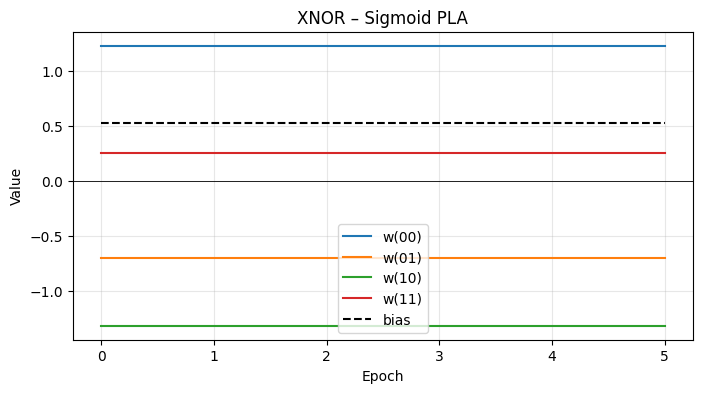


¬B — Threshold PLA

Initial (STEP – PLA)
w: [ 0.26408607  0.36627638 -0.93798964  0.80656246] b: -0.3344303274590519

Epoch 1
 Input 0 | z=-0.070 | ŷ=-1 | y=1
  → Updated w: [ 1.26408607  0.36627638 -0.93798964  0.80656246] b: 0.6655696725409481
 Input 1 | z=1.032 | ŷ=1 | y=-1
  → Updated w: [ 1.26408607 -0.63372362 -0.93798964  0.80656246] b: -0.3344303274590519
 Input 2 | z=-1.272 | ŷ=-1 | y=1
  → Updated w: [ 1.26408607 -0.63372362  0.06201036  0.80656246] b: 0.6655696725409481
 Input 3 | z=1.472 | ŷ=1 | y=-1
  → Updated w: [ 1.26408607 -0.63372362  0.06201036 -0.19343754] b: -0.3344303274590519

Epoch 2
 Input 0 | z=0.930 | ŷ=1 | y=1
 Input 1 | z=-0.968 | ŷ=-1 | y=-1
 Input 2 | z=-0.272 | ŷ=-1 | y=1
  → Updated w: [ 1.26408607 -0.63372362  1.06201036 -0.19343754] b: 0.6655696725409481
 Input 3 | z=0.472 | ŷ=1 | y=-1
  → Updated w: [ 1.26408607 -0.63372362  1.06201036 -1.19343754] b: -0.3344303274590519

Epoch 3
 Input 0 | z=0.930 | ŷ=1 | y=1
 Input 1 | z=-0.968 | ŷ=-1 | 

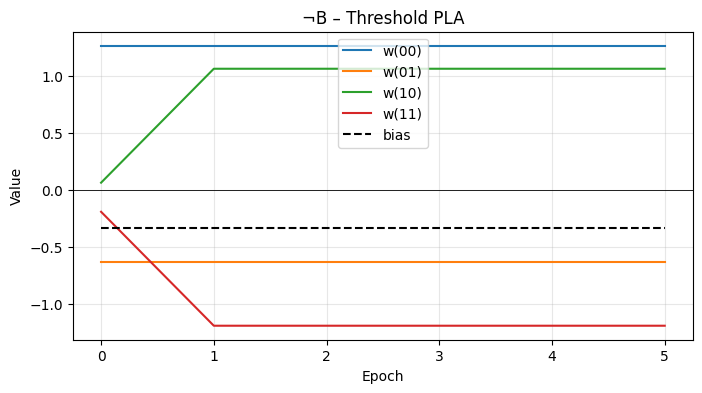


¬B — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.70832254 -0.06301491  0.1288495  -0.79300047] b: 0.9672724887195367

Epoch 1
 Input 0 | z=1.676 | σ(z)=0.842 | ŷ=1 | y=1
 Input 1 | z=0.904 | σ(z)=0.712 | ŷ=1 | y=-1
  → Updated w: [ 0.70832254 -1.06301491  0.1288495  -0.79300047] b: -0.03272751128046325
 Input 2 | z=0.096 | σ(z)=0.524 | ŷ=1 | y=1
 Input 3 | z=-0.826 | σ(z)=0.305 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=0.676 | σ(z)=0.663 | ŷ=1 | y=1
 Input 1 | z=-1.096 | σ(z)=0.251 | ŷ=-1 | y=-1
 Input 2 | z=0.096 | σ(z)=0.524 | ŷ=1 | y=1
 Input 3 | z=-0.826 | σ(z)=0.305 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=0.676 | σ(z)=0.663 | ŷ=1 | y=1
 Input 1 | z=-1.096 | σ(z)=0.251 | ŷ=-1 | y=-1
 Input 2 | z=0.096 | σ(z)=0.524 | ŷ=1 | y=1
 Input 3 | z=-0.826 | σ(z)=0.305 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=0.676 | σ(z)=0.663 | ŷ=1 | y=1
 Input 1 | z=-1.096 | σ(z)=0.251 | ŷ=-1 | y=-1
 Input 2 | z=0.096 | σ(z)=0.524 | ŷ=1 | y=1
 Input 3 | z=-0.826 | σ(z)=0.305 | ŷ=-1 | y=-1

Epoch 5
 Input

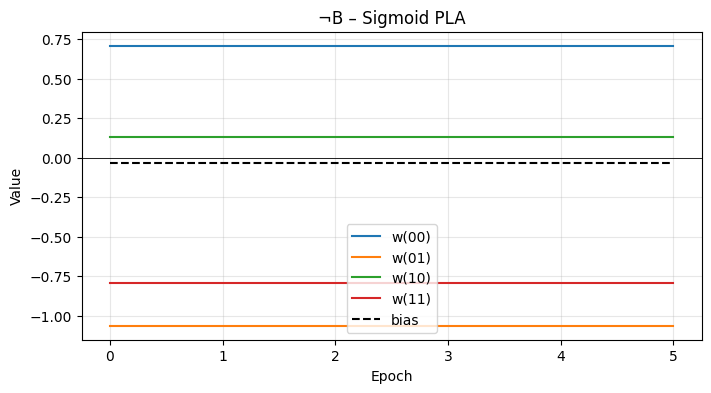


A∨¬B — Threshold PLA

Initial (STEP – PLA)
w: [-0.30661955  0.98785845 -0.87654054 -0.13864379] b: -0.142237788581838

Epoch 1
 Input 0 | z=-0.449 | ŷ=-1 | y=1
  → Updated w: [ 0.69338045  0.98785845 -0.87654054 -0.13864379] b: 0.857762211418162
 Input 1 | z=1.846 | ŷ=1 | y=-1
  → Updated w: [ 0.69338045 -0.01214155 -0.87654054 -0.13864379] b: -0.142237788581838
 Input 2 | z=-1.019 | ŷ=-1 | y=1
  → Updated w: [ 0.69338045 -0.01214155  0.12345946 -0.13864379] b: 0.857762211418162
 Input 3 | z=0.719 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=1.551 | ŷ=1 | y=1
 Input 1 | z=0.846 | ŷ=1 | y=-1
  → Updated w: [ 0.69338045 -1.01214155  0.12345946 -0.13864379] b: -0.142237788581838
 Input 2 | z=-0.019 | ŷ=-1 | y=1
  → Updated w: [ 0.69338045 -1.01214155  1.12345946 -0.13864379] b: 0.857762211418162
 Input 3 | z=0.719 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=1.551 | ŷ=1 | y=1
 Input 1 | z=-0.154 | ŷ=-1 | y=-1
 Input 2 | z=1.981 | ŷ=1 | y=1
 Input 3 | z=0.719 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=1.551

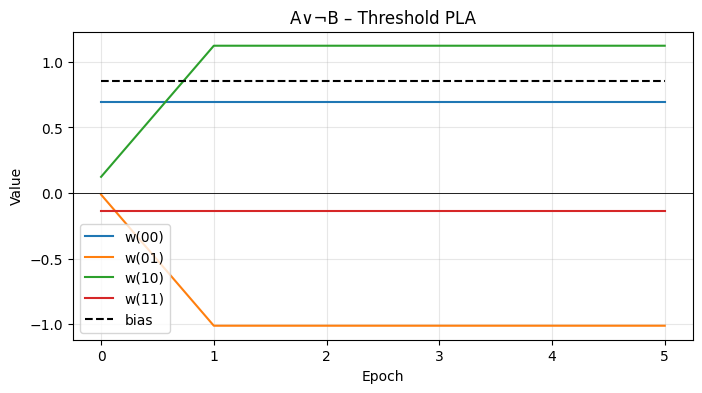


A∨¬B — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.34446222 -0.34459754 -0.45942194 -0.97537758] b: 0.22081685667407824

Epoch 1
 Input 0 | z=0.565 | σ(z)=0.638 | ŷ=1 | y=1
 Input 1 | z=-0.124 | σ(z)=0.469 | ŷ=-1 | y=-1
 Input 2 | z=-0.239 | σ(z)=0.441 | ŷ=-1 | y=1
  → Updated w: [ 0.34446222 -0.34459754  0.54057806 -0.97537758] b: 1.2208168566740782
 Input 3 | z=0.245 | σ(z)=0.561 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=1.565 | σ(z)=0.827 | ŷ=1 | y=1
 Input 1 | z=0.876 | σ(z)=0.706 | ŷ=1 | y=-1
  → Updated w: [ 0.34446222 -1.34459754  0.54057806 -0.97537758] b: 0.22081685667407824
 Input 2 | z=0.761 | σ(z)=0.682 | ŷ=1 | y=1
 Input 3 | z=-0.755 | σ(z)=0.320 | ŷ=-1 | y=1
  → Updated w: [ 0.34446222 -1.34459754  0.54057806  0.02462242] b: 1.2208168566740782

Epoch 3
 Input 0 | z=1.565 | σ(z)=0.827 | ŷ=1 | y=1
 Input 1 | z=-0.124 | σ(z)=0.469 | ŷ=-1 | y=-1
 Input 2 | z=1.761 | σ(z)=0.853 | ŷ=1 | y=1
 Input 3 | z=1.245 | σ(z)=0.777 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=1.565 | σ(z)=0.82

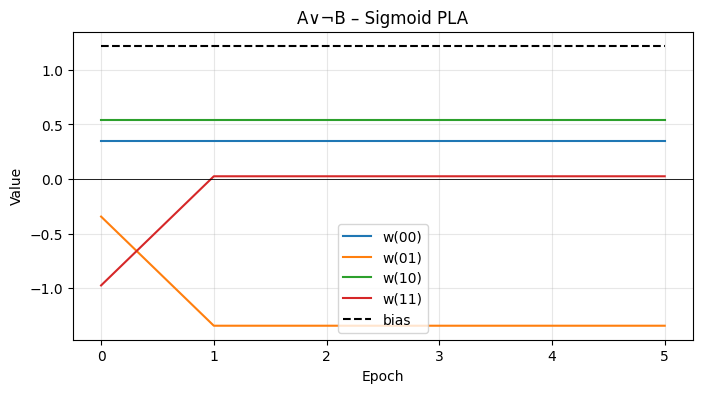


¬A — Threshold PLA

Initial (STEP – PLA)
w: [-0.5803212  -0.35971941 -0.8039095  -0.73665885] b: -0.05313911806692273

Epoch 1
 Input 0 | z=-0.633 | ŷ=-1 | y=1
  → Updated w: [ 0.4196788  -0.35971941 -0.8039095  -0.73665885] b: 0.9468608819330773
 Input 1 | z=0.587 | ŷ=1 | y=1
 Input 2 | z=0.143 | ŷ=1 | y=-1
  → Updated w: [ 0.4196788  -0.35971941 -1.8039095  -0.73665885] b: -0.05313911806692273
 Input 3 | z=-0.790 | ŷ=-1 | y=-1

Epoch 2
 Input 0 | z=0.367 | ŷ=1 | y=1
 Input 1 | z=-0.413 | ŷ=-1 | y=1
  → Updated w: [ 0.4196788   0.64028059 -1.8039095  -0.73665885] b: 0.9468608819330773
 Input 2 | z=-0.857 | ŷ=-1 | y=-1
 Input 3 | z=0.210 | ŷ=1 | y=-1
  → Updated w: [ 0.4196788   0.64028059 -1.8039095  -1.73665885] b: -0.05313911806692273

Epoch 3
 Input 0 | z=0.367 | ŷ=1 | y=1
 Input 1 | z=0.587 | ŷ=1 | y=1
 Input 2 | z=-1.857 | ŷ=-1 | y=-1
 Input 3 | z=-1.790 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=0.367 | ŷ=1 | y=1
 Input 1 | z=0.587 | ŷ=1 | y=1
 Input 2 | z=-1.857 | ŷ=-1

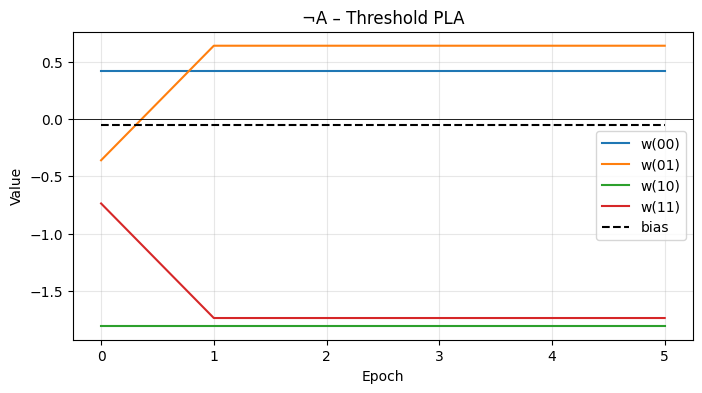


¬A — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [-0.81036286 -0.04735334 -0.39227897  0.3307424 ] b: 0.16541533657830798

Epoch 1
 Input 0 | z=-0.645 | σ(z)=0.344 | ŷ=-1 | y=1
  → Updated w: [ 0.18963714 -0.04735334 -0.39227897  0.3307424 ] b: 1.165415336578308
 Input 1 | z=1.118 | σ(z)=0.754 | ŷ=1 | y=1
 Input 2 | z=0.773 | σ(z)=0.684 | ŷ=1 | y=-1
  → Updated w: [ 0.18963714 -0.04735334 -1.39227897  0.3307424 ] b: 0.16541533657830798
 Input 3 | z=0.496 | σ(z)=0.622 | ŷ=1 | y=-1
  → Updated w: [ 0.18963714 -0.04735334 -1.39227897 -0.6692576 ] b: -0.834584663421692

Epoch 2
 Input 0 | z=-0.645 | σ(z)=0.344 | ŷ=-1 | y=1
  → Updated w: [ 1.18963714 -0.04735334 -1.39227897 -0.6692576 ] b: 0.16541533657830798
 Input 1 | z=0.118 | σ(z)=0.529 | ŷ=1 | y=1
 Input 2 | z=-1.227 | σ(z)=0.227 | ŷ=-1 | y=-1
 Input 3 | z=-0.504 | σ(z)=0.377 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=1.355 | σ(z)=0.795 | ŷ=1 | y=1
 Input 1 | z=0.118 | σ(z)=0.529 | ŷ=1 | y=1
 Input 2 | z=-1.227 | σ(z)=0.227 | ŷ=-1 | 

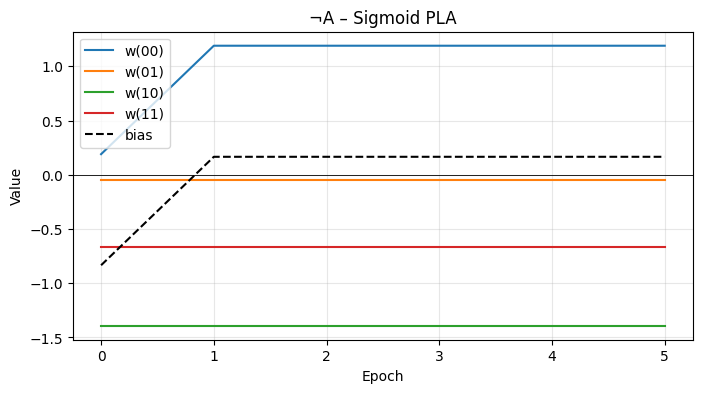


¬A∨B — Threshold PLA

Initial (STEP – PLA)
w: [ 0.76271675 -0.38124123 -0.99457933 -0.80704237] b: 0.7736483502588891

Epoch 1
 Input 0 | z=1.536 | ŷ=1 | y=1
 Input 1 | z=0.392 | ŷ=1 | y=1
 Input 2 | z=-0.221 | ŷ=-1 | y=-1
 Input 3 | z=-0.033 | ŷ=-1 | y=1
  → Updated w: [ 0.76271675 -0.38124123 -0.99457933  0.19295763] b: 1.7736483502588891

Epoch 2
 Input 0 | z=2.536 | ŷ=1 | y=1
 Input 1 | z=1.392 | ŷ=1 | y=1
 Input 2 | z=0.779 | ŷ=1 | y=-1
  → Updated w: [ 0.76271675 -0.38124123 -1.99457933  0.19295763] b: 0.7736483502588891
 Input 3 | z=0.967 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=1.536 | ŷ=1 | y=1
 Input 1 | z=0.392 | ŷ=1 | y=1
 Input 2 | z=-1.221 | ŷ=-1 | y=-1
 Input 3 | z=0.967 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=1.536 | ŷ=1 | y=1
 Input 1 | z=0.392 | ŷ=1 | y=1
 Input 2 | z=-1.221 | ŷ=-1 | y=-1
 Input 3 | z=0.967 | ŷ=1 | y=1

Epoch 5
 Input 0 | z=1.536 | ŷ=1 | y=1
 Input 1 | z=0.392 | ŷ=1 | y=1
 Input 2 | z=-1.221 | ŷ=-1 | y=-1
 Input 3 | z=0.967 | ŷ=1 | y=1

Epoch 

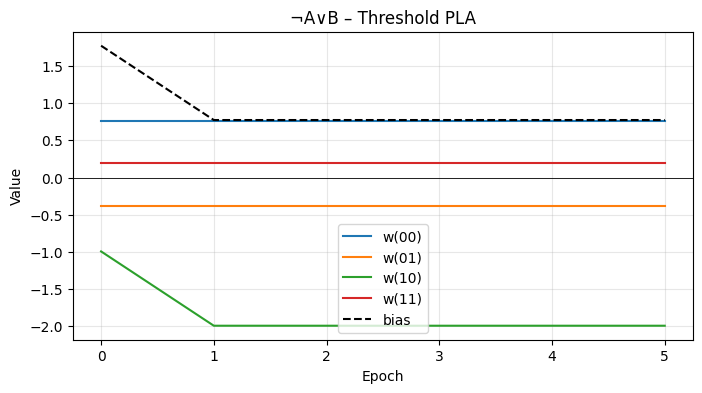


¬A∨B — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [-0.79689737 -0.5109124  -0.41788099  0.93138139] b: 0.43936073852716806

Epoch 1
 Input 0 | z=-0.358 | σ(z)=0.412 | ŷ=-1 | y=1
  → Updated w: [ 0.20310263 -0.5109124  -0.41788099  0.93138139] b: 1.439360738527168
 Input 1 | z=0.928 | σ(z)=0.717 | ŷ=1 | y=1
 Input 2 | z=1.021 | σ(z)=0.735 | ŷ=1 | y=-1
  → Updated w: [ 0.20310263 -0.5109124  -1.41788099  0.93138139] b: 0.43936073852716806
 Input 3 | z=1.371 | σ(z)=0.798 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=0.642 | σ(z)=0.655 | ŷ=1 | y=1
 Input 1 | z=-0.072 | σ(z)=0.482 | ŷ=-1 | y=1
  → Updated w: [ 0.20310263  0.4890876  -1.41788099  0.93138139] b: 1.439360738527168
 Input 2 | z=0.021 | σ(z)=0.505 | ŷ=1 | y=-1
  → Updated w: [ 0.20310263  0.4890876  -2.41788099  0.93138139] b: 0.43936073852716806
 Input 3 | z=1.371 | σ(z)=0.798 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=0.642 | σ(z)=0.655 | ŷ=1 | y=1
 Input 1 | z=0.928 | σ(z)=0.717 | ŷ=1 | y=1
 Input 2 | z=-1.979 | σ(z)=0.121 | ŷ=-1 | y=-1


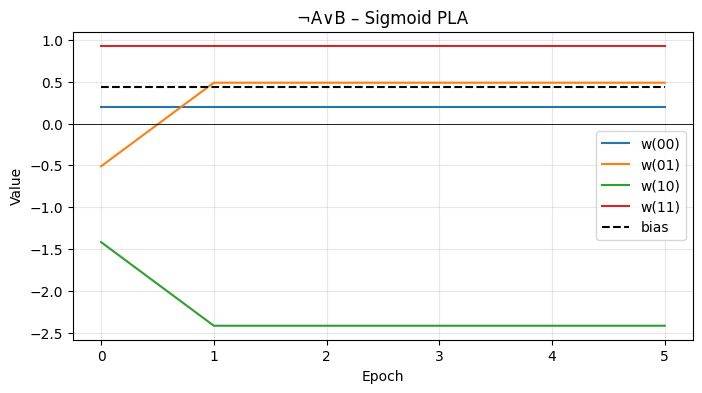


NAND — Threshold PLA

Initial (STEP – PLA)
w: [ 0.76444201  0.32296722  0.04088745 -0.12817138] b: 0.5340728565846855

Epoch 1
 Input 0 | z=1.299 | ŷ=1 | y=1
 Input 1 | z=0.857 | ŷ=1 | y=1
 Input 2 | z=0.575 | ŷ=1 | y=1
 Input 3 | z=0.406 | ŷ=1 | y=-1
  → Updated w: [ 0.76444201  0.32296722  0.04088745 -1.12817138] b: -0.4659271434153145

Epoch 2
 Input 0 | z=0.299 | ŷ=1 | y=1
 Input 1 | z=-0.143 | ŷ=-1 | y=1
  → Updated w: [ 0.76444201  1.32296722  0.04088745 -1.12817138] b: 0.5340728565846855
 Input 2 | z=0.575 | ŷ=1 | y=1
 Input 3 | z=-0.594 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=1.299 | ŷ=1 | y=1
 Input 1 | z=1.857 | ŷ=1 | y=1
 Input 2 | z=0.575 | ŷ=1 | y=1
 Input 3 | z=-0.594 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=1.299 | ŷ=1 | y=1
 Input 1 | z=1.857 | ŷ=1 | y=1
 Input 2 | z=0.575 | ŷ=1 | y=1
 Input 3 | z=-0.594 | ŷ=-1 | y=-1

Epoch 5
 Input 0 | z=1.299 | ŷ=1 | y=1
 Input 1 | z=1.857 | ŷ=1 | y=1
 Input 2 | z=0.575 | ŷ=1 | y=1
 Input 3 | z=-0.594 | ŷ=-1 | y=-1

Epoch

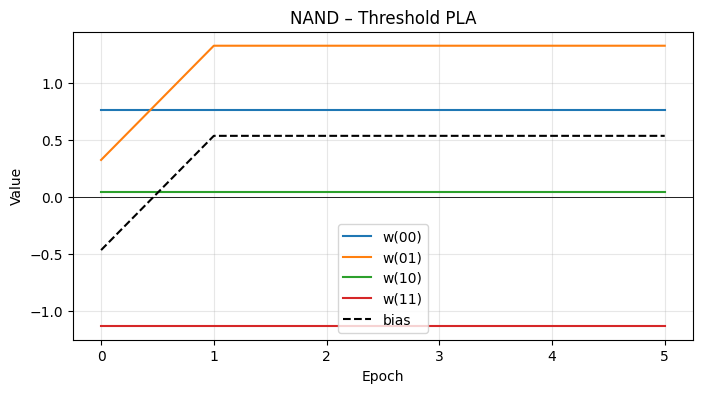


NAND — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.25432116 -0.69351171 -0.01216857 -0.77548193] b: 0.34097145417133534

Epoch 1
 Input 0 | z=0.595 | σ(z)=0.645 | ŷ=1 | y=1
 Input 1 | z=-0.353 | σ(z)=0.413 | ŷ=-1 | y=1
  → Updated w: [ 0.25432116  0.30648829 -0.01216857 -0.77548193] b: 1.3409714541713353
 Input 2 | z=1.329 | σ(z)=0.791 | ŷ=1 | y=1
 Input 3 | z=0.565 | σ(z)=0.638 | ŷ=1 | y=-1
  → Updated w: [ 0.25432116  0.30648829 -0.01216857 -1.77548193] b: 0.34097145417133534

Epoch 2
 Input 0 | z=0.595 | σ(z)=0.645 | ŷ=1 | y=1
 Input 1 | z=0.647 | σ(z)=0.656 | ŷ=1 | y=1
 Input 2 | z=0.329 | σ(z)=0.581 | ŷ=1 | y=1
 Input 3 | z=-1.435 | σ(z)=0.192 | ŷ=-1 | y=-1

Epoch 3
 Input 0 | z=0.595 | σ(z)=0.645 | ŷ=1 | y=1
 Input 1 | z=0.647 | σ(z)=0.656 | ŷ=1 | y=1
 Input 2 | z=0.329 | σ(z)=0.581 | ŷ=1 | y=1
 Input 3 | z=-1.435 | σ(z)=0.192 | ŷ=-1 | y=-1

Epoch 4
 Input 0 | z=0.595 | σ(z)=0.645 | ŷ=1 | y=1
 Input 1 | z=0.647 | σ(z)=0.656 | ŷ=1 | y=1
 Input 2 | z=0.329 | σ(z)=0.5

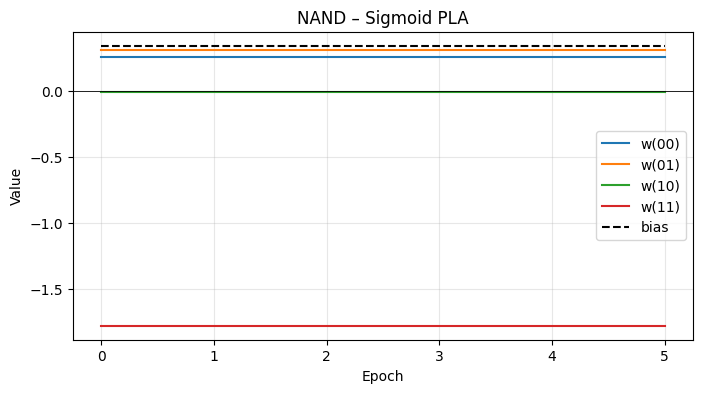


TRUE — Threshold PLA

Initial (STEP – PLA)
w: [ 0.15715704 -0.63919342 -0.72290037 -0.50181879] b: 0.2051143713831256

Epoch 1
 Input 0 | z=0.362 | ŷ=1 | y=1
 Input 1 | z=-0.434 | ŷ=-1 | y=1
  → Updated w: [ 0.15715704  0.36080658 -0.72290037 -0.50181879] b: 1.2051143713831256
 Input 2 | z=0.482 | ŷ=1 | y=1
 Input 3 | z=0.703 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=1.362 | ŷ=1 | y=1
 Input 1 | z=1.566 | ŷ=1 | y=1
 Input 2 | z=0.482 | ŷ=1 | y=1
 Input 3 | z=0.703 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=1.362 | ŷ=1 | y=1
 Input 1 | z=1.566 | ŷ=1 | y=1
 Input 2 | z=0.482 | ŷ=1 | y=1
 Input 3 | z=0.703 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=1.362 | ŷ=1 | y=1
 Input 1 | z=1.566 | ŷ=1 | y=1
 Input 2 | z=0.482 | ŷ=1 | y=1
 Input 3 | z=0.703 | ŷ=1 | y=1

Epoch 5
 Input 0 | z=1.362 | ŷ=1 | y=1
 Input 1 | z=1.566 | ŷ=1 | y=1
 Input 2 | z=0.482 | ŷ=1 | y=1
 Input 3 | z=0.703 | ŷ=1 | y=1

Epoch 6
 Input 0 | z=1.362 | ŷ=1 | y=1
 Input 1 | z=1.566 | ŷ=1 | y=1
 Input 2 | z=0.482 | ŷ=1 | y=1
 I

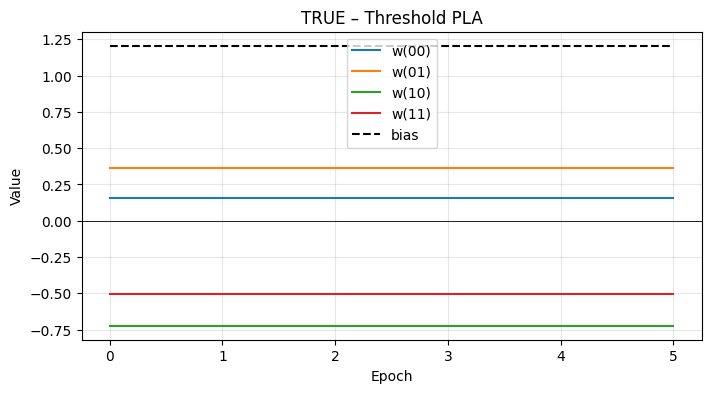


TRUE — Sigmoid PLA

Initial (SIGMOID – PLA)
w: [ 0.91483532  0.8208603  -0.46112475  0.66251123] b: -0.5631510917447862

Epoch 1
 Input 0 | z=0.352 | σ(z)=0.587 | ŷ=1 | y=1
 Input 1 | z=0.258 | σ(z)=0.564 | ŷ=1 | y=1
 Input 2 | z=-1.024 | σ(z)=0.264 | ŷ=-1 | y=1
  → Updated w: [0.91483532 0.8208603  0.53887525 0.66251123] b: 0.43684890825521383
 Input 3 | z=1.099 | σ(z)=0.750 | ŷ=1 | y=1

Epoch 2
 Input 0 | z=1.352 | σ(z)=0.794 | ŷ=1 | y=1
 Input 1 | z=1.258 | σ(z)=0.779 | ŷ=1 | y=1
 Input 2 | z=0.976 | σ(z)=0.726 | ŷ=1 | y=1
 Input 3 | z=1.099 | σ(z)=0.750 | ŷ=1 | y=1

Epoch 3
 Input 0 | z=1.352 | σ(z)=0.794 | ŷ=1 | y=1
 Input 1 | z=1.258 | σ(z)=0.779 | ŷ=1 | y=1
 Input 2 | z=0.976 | σ(z)=0.726 | ŷ=1 | y=1
 Input 3 | z=1.099 | σ(z)=0.750 | ŷ=1 | y=1

Epoch 4
 Input 0 | z=1.352 | σ(z)=0.794 | ŷ=1 | y=1
 Input 1 | z=1.258 | σ(z)=0.779 | ŷ=1 | y=1
 Input 2 | z=0.976 | σ(z)=0.726 | ŷ=1 | y=1
 Input 3 | z=1.099 | σ(z)=0.750 | ŷ=1 | y=1

Epoch 5
 Input 0 | z=1.352 | σ(z)=0.

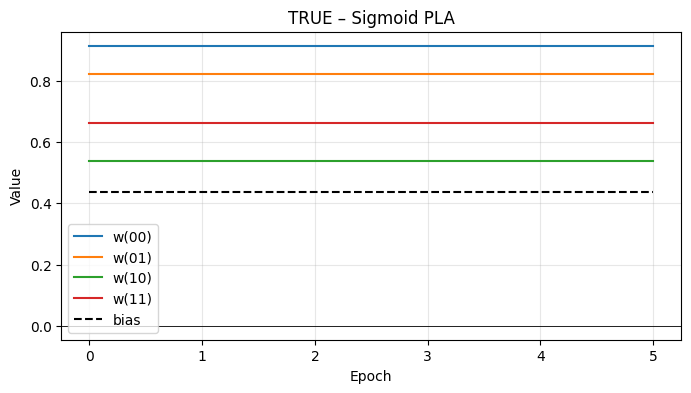

In [12]:
for name, truth in BOOLEAN_FUNCTIONS.items():

    print(f"\n==============================")
    print(f"{name} — Threshold PLA")
    print("==============================")

    w_step, b_step = train_step_PLA(truth, epochs=6)
    plot_learning(w_step, b_step, f"{name} – Threshold PLA")

    print(f"\n{name} — Sigmoid PLA")
    print("==============================")

    w_sig, b_sig = train_sigmoid_PLA(truth, epochs=6)
    plot_learning(w_sig, b_sig, f"{name} – Sigmoid PLA")
